# Viktor Veselov

AAI-510-01 </br>
Assignment 4

Feature engineering used: </br>
* Creating a new data set
* Droping NA
* Droping Outliers
Creating a new column named: Ratio Balance to Debt


Our solutions resulted significant performance increase, increase in f1-score, improved loss function, better recall, elimination of over and under fiting.

Note, we will develop a new column closer to the end

In [1]:
!pip install dataprep --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 637.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report #
#@title Loading the required libraries
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, mean_squared_error
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV
import missingno as msno


%matplotlib inline

from sklearn import tree # Import Tree Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers
#@title Mounting your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir(r'/content/drive/My Drive/')

Mounted at /content/drive/


# Show the production of df7 data set

We believe that to maintain the integrity of the research, we should present the steps we used to create this data set. As those steps were explained in previous modules, we will simply copy and paste them, assuming that the reader is already familiar with this research. Additionally, we will utilize the already pre-saved and pre-designed df7.

Another note, previously, we attempted to focus on accuracy and explore different features. However, this time we aimed to primarily focus on improving our model's f1-score.

In [ ]:
#Let's form a Hypotheses
Primary goal to find a group of people that has the smallest chance for default. In order to do it, we need to 
explore their past, balance, loanes, cash, and how long it did take them to do so. We will explore each data set
and choose a few interesting columns. Than build some trivial data visualisation.


from google.colab import drive
drive.mount('/content/drive/')
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

import os
os.chdir(r'/content/drive/My Drive/')
Finding Columns

df0= pd.read_csv("bureau.csv")

df0.head(4)

From this data set we will choose DAYS_CREDIT = How many days before current application did client apply for Credit Bureau credit,
 AMT_CREDIT_SUM = Current credit amount for the Credit Bureau credit, AMT_CREDIT_SUM_DEBT = Current debt on Credit Bureau credit,
  AMT_CREDIT_SUM_OVERDUE = Current amount overdue on Credit Bureau credit


df1= pd.read_csv("bureau_balance.csv")
<ipython-input-5-cbd2e11a0a76>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv("bureau_balance.csv")

df1.head(4)

Nothing inteteresting in particular


df2= pd.read_csv("POS_CASH_balance.csv")

df2.head(4)

Could be interesting if we had enough resources to utilise it.


df3= pd.read_csv("credit_card_balance.csv")

df3.head(4)

From this data set we choose AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT,
 AMT_TOTAL_RECEIVABLE, CNT_INSTALMENT_MATURE_CUM


df4= pd.read_csv("previous_application.csv")

df4.head(4)


df5= pd.read_csv("installments_payments.csv")

df5.head(5)


df6= pd.read_csv("HomeCredit_columns_description.csv", encoding='cp1252')

df6.head(4)


# Extract columns from df0
df0_cols = df0[['DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE', 'SK_ID_CURR']]

# Extract columns from df3
df3_cols = df3[['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'SK_ID_CURR',
                'AMT_DRAWINGS_CURRENT', 'AMT_TOTAL_RECEIVABLE', 'CNT_INSTALMENT_MATURE_CUM']]
# Merge the datasets on the common ID column
df6 = df_merged = pd.merge(df0_cols, df3_cols, on='SK_ID_CURR', how='inner')
the datasets are merged based on 'SK_ID_CURR' column.

We just combined two data sets by their id's while keeping integrity of a data set. In other words. 
If id=1 and another id=1 it will insert numbers from one columns to the other with respect to each other.

df6 = pd.read_csv('df6.csv')
df6 = df6.dropna()

# Do same thing for TARGED
df8= pd.read_csv("application_train.csv")
# Extract columns from df6
df6_cols = df6[['DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE', 'SK_ID_CURR',
                'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
                'AMT_DRAWINGS_CURRENT', 'AMT_TOTAL_RECEIVABLE', 'CNT_INSTALMENT_MATURE_CUM']]

# Extract columns from df8
df8_cols = df8[['TARGET', 'SK_ID_CURR']]
# Merge the datasets on the common ID column
df7 = df_merged = pd.merge(df6_cols, df8_cols, on='SK_ID_CURR', how='inner')

In [3]:
df7= pd.read_csv("df7.csv")

In [ ]:
#@title Data Set Summary
# Display the first 5 rows of the dataframe
print("First 5 rows of the dataframe:")
print(df7.head())

# Display the last 5 rows of the dataframe
print("\nLast 5 rows of the dataframe:")
print(df7.tail())

# Display the shape of the dataframe
print("\nNumber of rows and columns in the dataframe:")
print(df7.shape)

# Display column names
print("\nColumn names:")
print(df7.columns.tolist())

# Display data types of columns
print("\nData types of columns:")
print(df7.dtypes)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df7.describe())

# Count of null values in each column
print("\nCount of null values in each column:")
print(df7.isnull().sum())


First 5 rows of the dataframe:
   Unnamed: 0  DAYS_CREDIT  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0           0         -497         91323.0                  0.0   
1           1         -497         91323.0                  0.0   
2           2         -497         91323.0                  0.0   
3           3         -497         91323.0                  0.0   
4           4         -497         91323.0                  0.0   

   AMT_CREDIT_SUM_OVERDUE  SK_ID_CURR  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0                     0.0      215354   424505.025                 450000.0   
1                     0.0      215354   133842.150                 450000.0   
2                     0.0      215354   146877.660                 450000.0   
3                     0.0      215354   440171.190                 450000.0   
4                     0.0      215354   370571.985                 450000.0   

   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_TOTAL_RECEIVABLE  \
0               

In [4]:
#@title Drop Unnamed:0 column
df7 = df7.drop("Unnamed: 0", axis=1)

As per assignment 1, we decided not to trim outliers since it would make our data set singular, resulting in all users experiencing difficulties.

# Desicion Tree Initial Model and Tuned

In [ ]:
#@title Predict TARGET
X = df7.drop('TARGET', axis=1)
y = df7['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#@title Create Default Decision Tree classifer object
clf = tree.DecisionTreeClassifier(random_state=1) 

# Train and test the classifier
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer
y_hat = clf.predict(X_train) # Predict the response for train dataset
y_pred = clf.predict(X_test) # Predict the response for test dataset
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9846404180334952


Run time 1 minute

As we can observe, our decision tree achieved 100% accuracy on our training data, but a slightly lower accuracy of 98.46% on our test data. This indicates that our model is over fitting, although it is not conclusive.

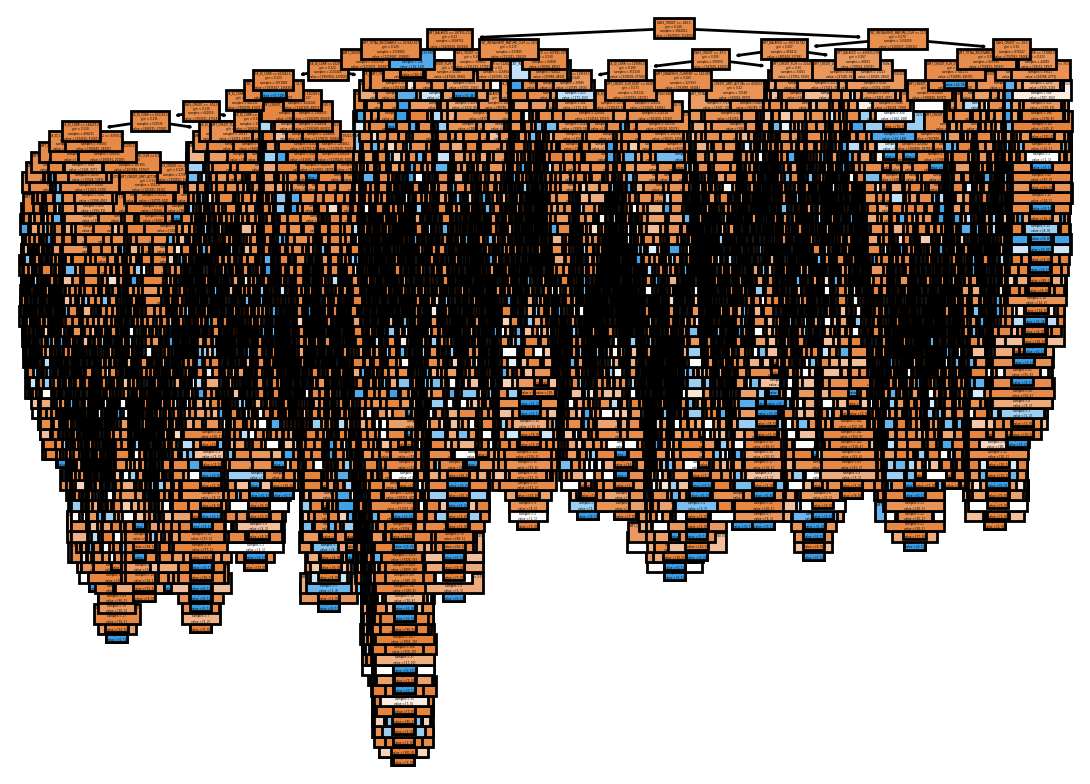

Precision: 0.900229120473023
Recall: 0.9085287623821459
F1 Score: 0.9043598996153903
Confusion Matrix:
 [[1541871   13499]
 [  12263  121801]]
AUC-ROC: 0.9499248992671577


In [ ]:
#@title Graph Results
plt.rcParams['figure.dpi'] = 200 # To increase the resolution from 100dpi to 200dpi

# Plot the tree
f_names=list(X.columns) # Feature names
tree.plot_tree(clf, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Precision, Recall, F1 Score & Confusion Matrix
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
y_pred_proba = clf.predict_proba(X_test)[::,1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))


Time 58 minutes

After re-engineering data set we were able to achive interstellar results. A shocking f1-score of 0.9085

In [ ]:
#@title Create Fine-Tuned Decision Tree classifer object by spefifying parameters
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=100, min_samples_leaf=1000, criterion="gini", random_state=1) 

# Train and test the classifier
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer
y_hat = clf.predict(X_train) # Predict the response for train dataset
y_pred = clf.predict(X_test) # Predict the response for test dataset
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.9206861675424041
Test Accuracy: 0.9206456126726466


Run time 12 seconds

Fine-tuned model is perfectly balance. In other words, it is not over feating or under feating.

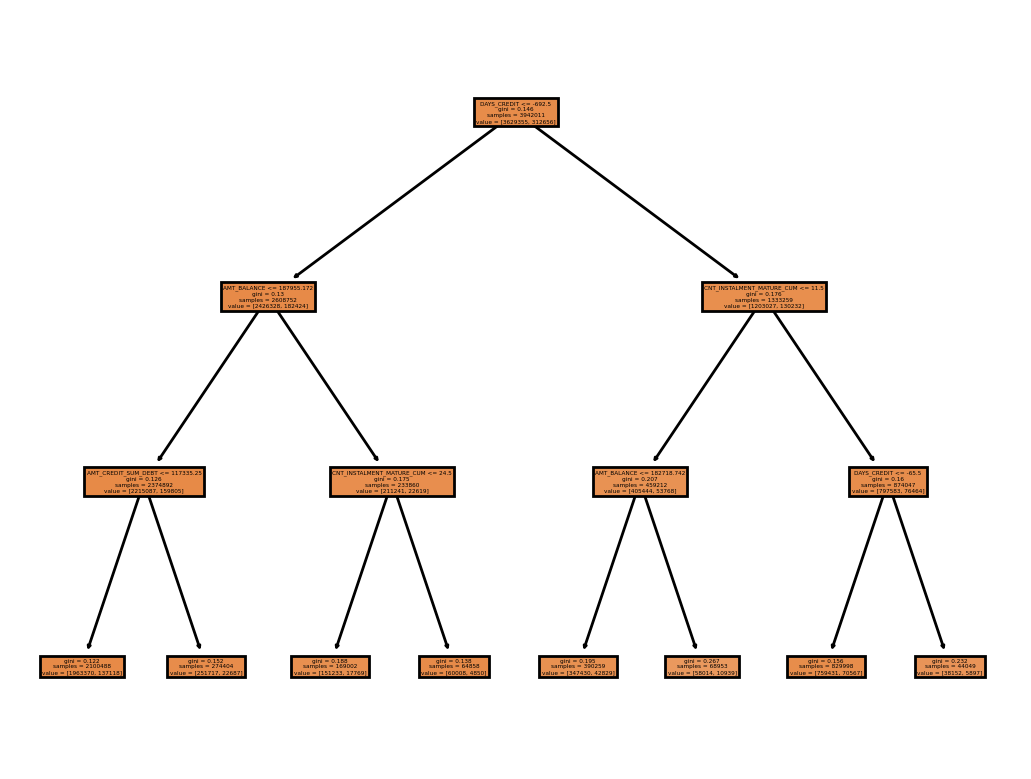

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[1555370       0]
 [ 134064       0]]
AUC-ROC: 0.5618571978261059


In [ ]:
#title Plot those results
plt.rcParams['figure.dpi'] = 200 # To increase the resolution from 100dpi to 200dpi

# Plot the tree
f_names=list(X.columns) # Feature names
tree.plot_tree(clf, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text

# Precision, Recall, F1 Score & Confusion Matrix
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
y_pred_proba = clf.predict_proba(X_test)[::,1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

After utilising identical parameters from module 2 we observed drastic decrease in our model's performance. It is clear to us that data remodeling did change hyper parameters dramatically.

# Initial XGBoost

In [ ]:
#@title Create Default XGBClassifier object
X = df7.drop('TARGET', axis=1)
y = df7['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

xgb_clf = XGBClassifier(random_state=1)

# Train XGBClassifier
xgb_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = xgb_clf.predict(X_test)
# For XGBoost model
#y_pred_xgb = xgb_clf.predict(X_test)
# Predict the response for train dataset
y_hat = xgb_clf.predict(X_train)
# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Calculate probabilities for the positive class for test dataset
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Train Accuracy: 0.9451399298479888
Test Accuracy: 0.9446974548872581
Precision: 0.9775751022518923
Recall: 0.31021004893185344
F1 Score: 0.4709692762420303
Confusion Matrix:
 [[1554416     954]
 [  92476   41588]]
ROC AUC Score: 0.875855892739478
Log Loss: 0.18457287162695132


Time 12 minutes

When comparing the test and train accuracy, we observe that there is almost no overfitting or underfitting. However, it significantly produces worse results in comparison to the default decision tree.

Precision: 0.9775751022518923
Recall: 0.31021004893185344
F1 score: 0.4709692762420303


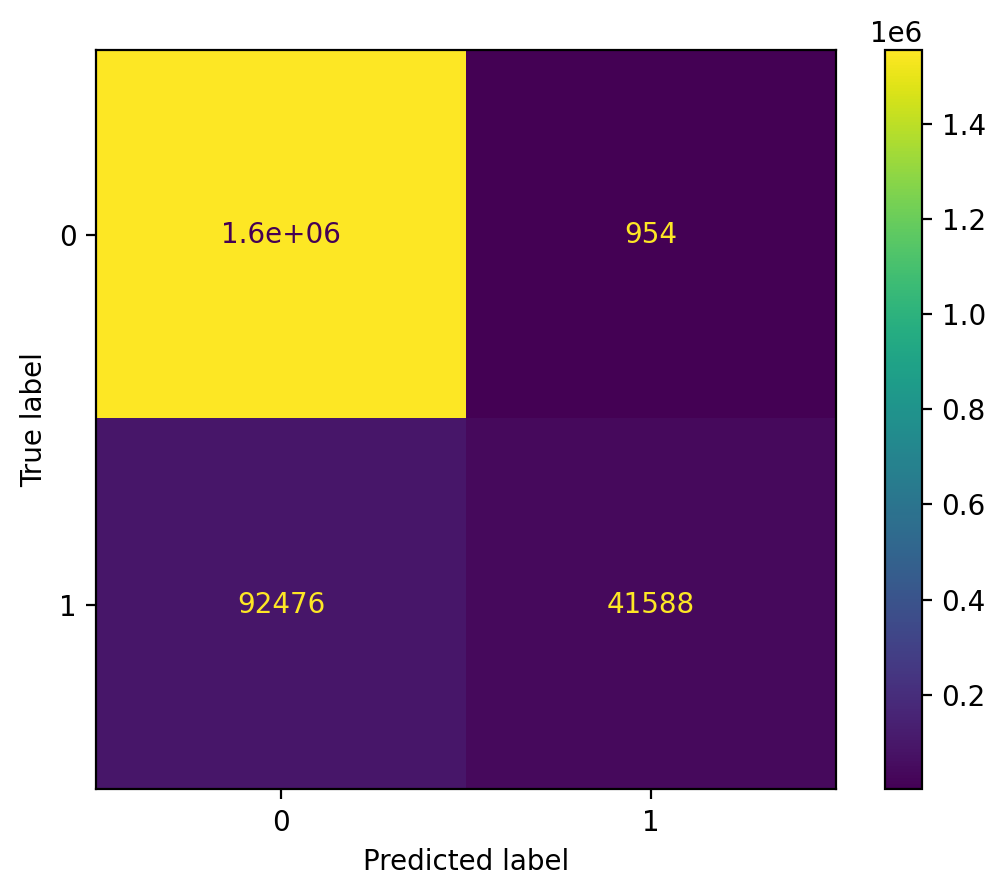

In [ ]:
#@title Evaluation Metrics For Default XGBoost

print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();
# Calculate F1 score
f1 = f1_score(y_test, y_pred_xgb)

# Print the F1 score
print("F1 score:", f1)


As we observe, the precision of our model is 97%, while the f1-score is relatively low at 45%. These results are interesting, considering that the default decision tree produced excellent results with an f1-score of around 90%. We expected to see better results when using the Default XGBoost, so it was surprising for us to observe such a drastic decrease in the f1-score.

Note that this is the second iteration of the df7 data set. Previously, we had already designed the df7 data set, but we discovered some inconsistencies in the way we merged files. We noticed these inconsistencies in module 3 when we were performing fine-tuning for k-means. Initially, we had not correctly combined the df0 and df3 files, meaning that we simply merged the files without considering the SK_ID_CURR column. This column is critical since each SK_ID_CURR represents a unique client or customer ID. For our second iteration, we utilized the merge() feature while taking into account the SK_ID_CURR, which allowed us to combine the columns with respect to SK_ID_CURR without overlapping or mixing other data sets. This change was a significant improvement in Data Engineering. As a result of this change, we were able to dramatically improve the f1-score of XGBoost from 0.01 to an impressive 0.45, representing a 4,500% improvement compared to the previous iteration.

# Tuned XGBoost

Due to computational power limitations we had to become mroe creative regarding to our data set. as a result we utilized the confidence interval of the mean. While there is still 5% error rate. Still, due to our computational limitationce. We determined that this is a better way. We will find 3 best paramters for XGBoost in the following ranges:  </br>  
* n_estimators: [100, 200, 500],</br>
* max_depth: [3, 5, 7, 10],</br>
* learning_rate: [0.01, 0.1, 0.2].</br>
After determinging those parameters for smaller data set. We will apply same parameters for a whole data set and review results.


Confidence interval of the mean:</br>
**n = (Z^2 * σ^2 * P(1-P)) / E^2** </br>

where:</br>

* n is the sample size </br>
* Z is the Z-score (which corresponds to the desired confidence level, e.g., for a 95% confidence level, Z = 1.96)</br>
*  σ is the population standard deviation </br>
* P is the population proportion (in case of proportion estimation)</br>
* E is the margin of error</br>

We found that a minimume data points is ~6600 data points. It means that as long as each row has at least 6600 data points we are good to use it.

In [ ]:
#@title Create a Subset  
# Set the fraction of data to keep
fraction = 0.1  # Keep 10% of the data

# Create the subset
df7_subset = df7.sample(frac=fraction, random_state=1)


In [ ]:
#@title Find Hyper Parameters For XGBoost

# Separate features and target from df7_subset
X = df7_subset.drop('TARGET', axis=1)
y = df7_subset['TARGET']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
xgb = XGBClassifier()

# Set parameters you want to tune
parameters = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500}
Best Score: 0.9572245093676637


Run time 3.5 hours

After running for 3.5 hours, we discovered that the most optimal best parameters are 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500. These parameters were trained on the df7_subset. Now, let's utilize these parameters for the original df7 data set. The best score achieved is 0.9572.
* "Best Score" is the highest cross-validation accuracy that the GridSearchCV could achieve with the provided hyperparameters.

In [ ]:
#@title XGBoost Metrics (Fine-Tuned)

# Predict the response for test dataset using the best estimator from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Predict the response for train dataset
y_hat = grid_search.best_estimator_.predict(X_train)

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Calculate probabilities for the positive class for test dataset
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:,1]

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Train Accuracy: 0.9832058865964507
Test Accuracy: 0.9646183487378917
Precision: 0.9870103916866507
Recall: 0.5575121345524325
F1 Score: 0.7125441823559114
Confusion Matrix:
 [[103705     65]
 [  3920   4939]]
ROC AUC Score: 0.9766787576260736
Log Loss: 0.10178767383598901


We tend to believe that one possible reason why XGBoost yields lower results than the default decision tree is due to the following factors: </br>
* Outliers and missing values: Decision trees are generally robust to outliers and missing values in the data. They can handle such irregularities without a significant impact on their performance. However, XGBoost, especially when fine-tuned, might be more sensitive to outliers and missing values. This increased sensitivity could potentially lead to suboptimal performance compared to the default decision tree.

In [ ]:
#@title Re-set Parameters
X = df7.drop('TARGET', axis=1)
y = df7['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Train Accuracy: 0.9889893762346174
Test Accuracy: 0.9868074159748176
Precision: 0.9983948063066277
Recall: 0.835093686597446
F1 Score: 0.9094719740048741
Confusion Matrix:
 [[1555190     180]
 [  22108  111956]]
ROC AUC Score: 0.9980968959849026
Log Loss: 0.05482328729614673


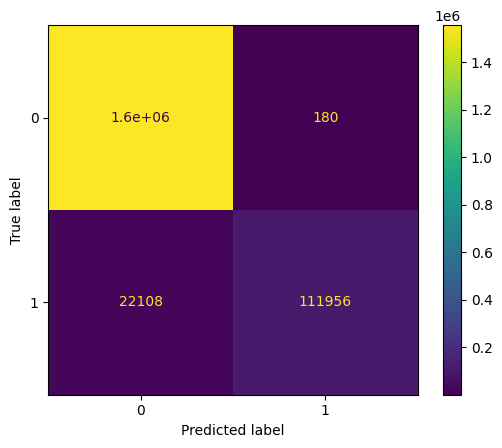

In [ ]:
#@title Create Fine-Tunned XGBClassifier With Best Parameters Found Above
xgb_clf = XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.2, random_state=1)

# Train XGBClassifier
xgb_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = xgb_clf.predict(X_test)
# For XGBoost model
#y_pred_xgb = xgb_clf.predict(X_test)
# Predict the response for train dataset
y_hat = xgb_clf.predict(X_train)
# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Calculate probabilities for the positive class for test dataset
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)
# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Run time 1 hour 38 minutes

Those results are bieoned our expectations. We were able to achive f1-score of 90.095% with incredibally low Log Loss: 0.05482328729614673. Initially, we did not expect to produce such an impressive results.


It is important to note that this is the second iteration of the df7 data set. In the previous iteration, we had already designed the df7 data set, but we discovered some inconsistencies in the way we merged files. These inconsistencies came to our attention during module 3 when we were performing fine-tuning for k-means. Initially, we had not correctly combined the df0 and df3 files. In other words, we merged the files without considering the SK_ID_CURR column. This SK_ID_CURR column is a critical feature as it represents each unique client or customer ID. For our second iteration, we utilized the merge() feature, taking into account the SK_ID_CURR column. This allowed us to combine the columns based on SK_ID_CURR without overlapping or mixing other data sets. This improvement in data engineering was drastic. As a result of this change, we were able to improve... (the rest of the sentence is cut off, please provide the complete sentence you would like me to continue with).

# Developing a New Column and Running a Tunned Model

We believe that XGBoost generally outperforms a regular decision tree. Therefore, we decided to compare the performance of the Default XGBoost to a newly created data set and compare the results with a minimum improvement of 20% in 1-3 parameters. In addition to that, we will drop all rows containing missing values, but only for the newly created column, and we will normalize the data set. Furthermore, because we will normalize our data set... (please provide the continuation of the sentence as it was cut off).

In this section we from df7 divide values from column AMT_BALANCE over AMT_CREDIT_SUM. Save those values in a new column named Ratio Balance to Debt. Than  drop all NA values ONLY from a newly created column Ratio Balance to Debt. We will try to use debt to gdp principle, but to people.
https://www.experian.com/blogs/ask-experian/what-is-debt-to-credit-ratio/#:~:text=a%20safer%20borrower.-,How%20to%20Calculate%20Debt%2Dto%2DCredit%20Ratio,to%20get%20your%20overall%20ratio. 

In [7]:
#@title Calculate the ratio and create the new column
df7['Ratio Balance to Debt'] = df7['AMT_BALANCE'] / df7['AMT_CREDIT_SUM']

# Drop NA values from the new column
df7 = df7[df7['Ratio Balance to Debt'].notna()]

In [8]:
print((df7 == np.inf).sum())
print((df7 == -np.inf).sum())

DAYS_CREDIT                       0
AMT_CREDIT_SUM                    0
AMT_CREDIT_SUM_DEBT               0
AMT_CREDIT_SUM_OVERDUE            0
SK_ID_CURR                        0
AMT_BALANCE                       0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_DRAWINGS_ATM_CURRENT          0
AMT_DRAWINGS_CURRENT              0
AMT_TOTAL_RECEIVABLE              0
CNT_INSTALMENT_MATURE_CUM         0
TARGET                            0
Ratio Balance to Debt        144093
dtype: int64
DAYS_CREDIT                    0
AMT_CREDIT_SUM                 0
AMT_CREDIT_SUM_DEBT            0
AMT_CREDIT_SUM_OVERDUE         0
SK_ID_CURR                     0
AMT_BALANCE                    0
AMT_CREDIT_LIMIT_ACTUAL        0
AMT_DRAWINGS_ATM_CURRENT       0
AMT_DRAWINGS_CURRENT           0
AMT_TOTAL_RECEIVABLE           0
CNT_INSTALMENT_MATURE_CUM      0
TARGET                         0
Ratio Balance to Debt        229
dtype: int64


There are some row with inf values, let's fix it

<Axes: >

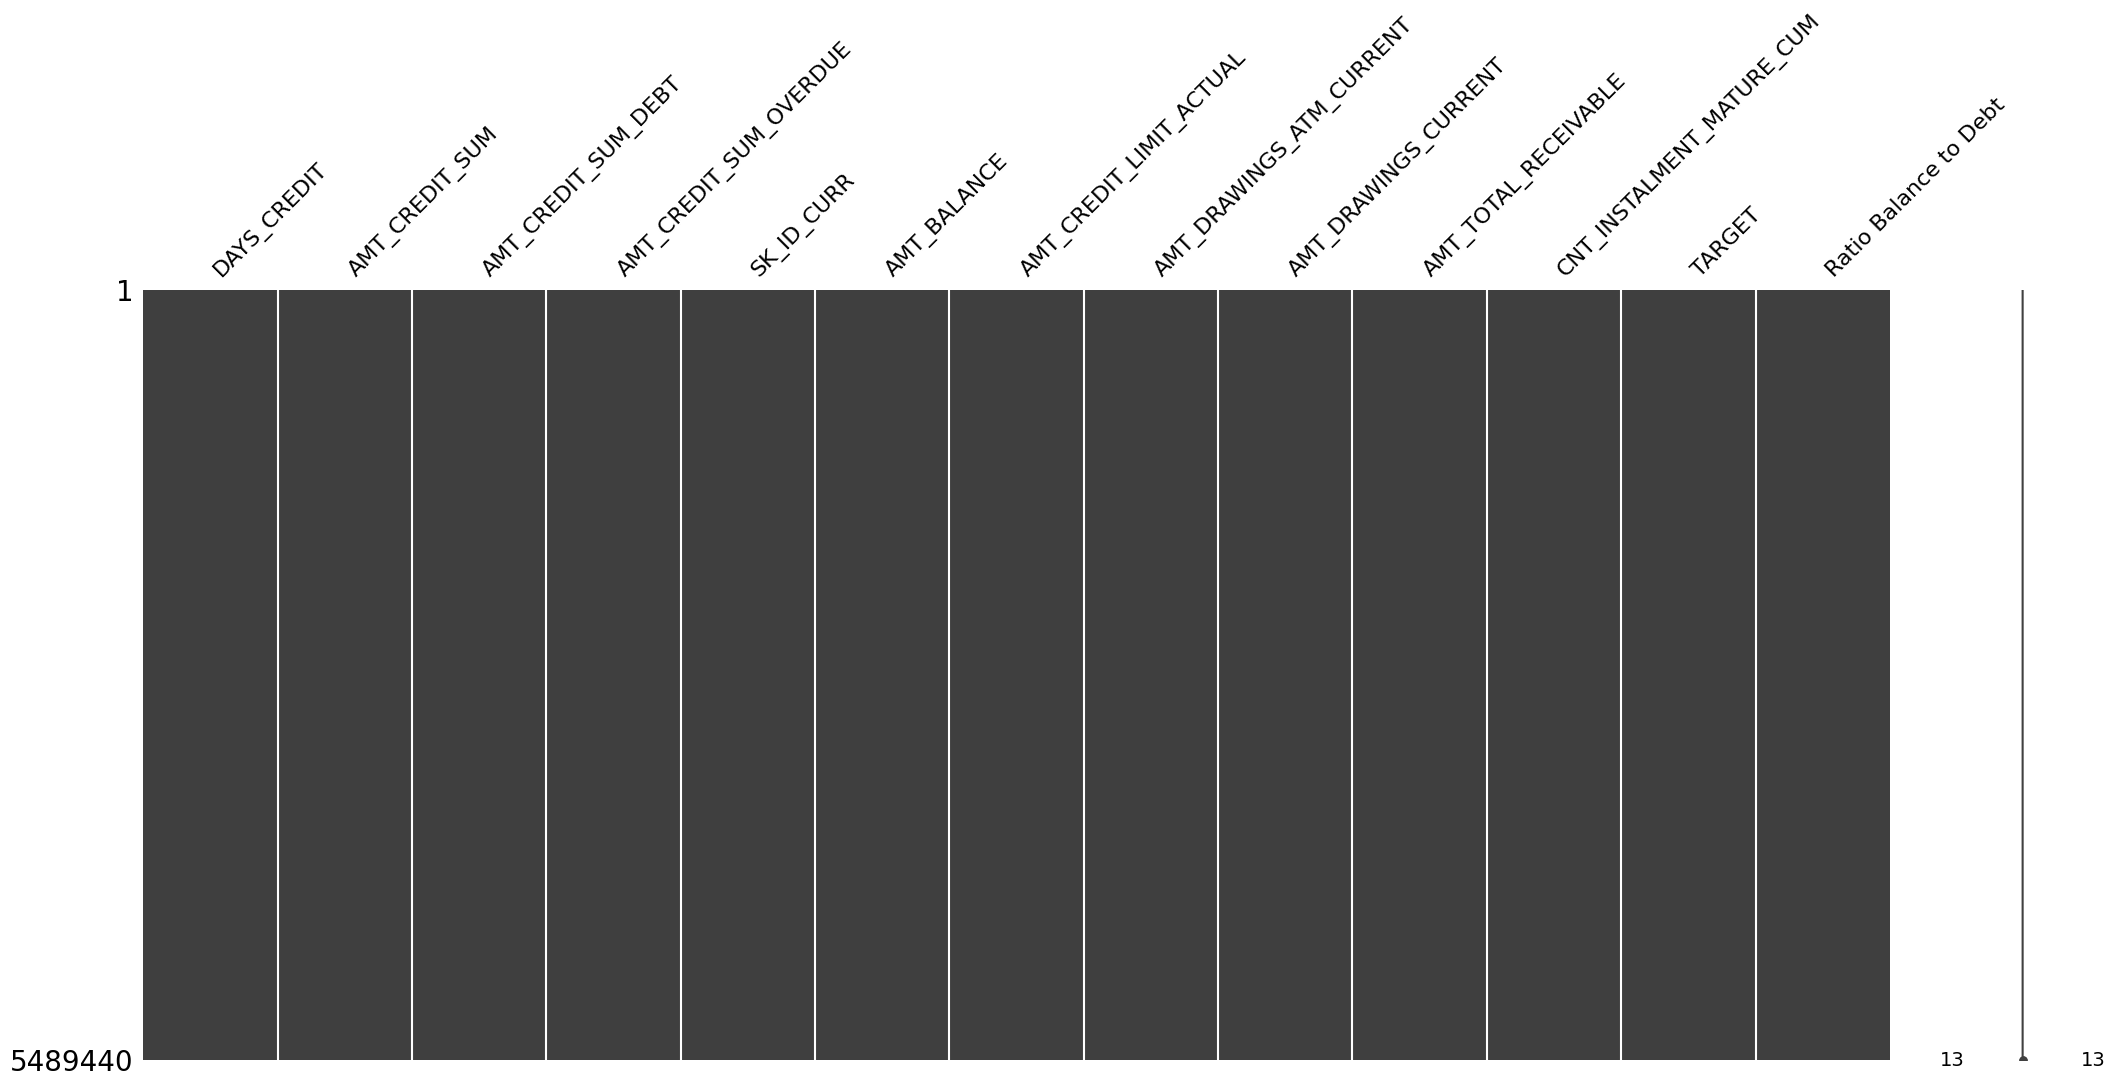

In [ ]:
#@title Gives positional information of the missing values

msno.matrix(df7)

In [ ]:
print(df7.isna().values.any())

False


As we can see there are not missing values

In [9]:
#@title Create a Subset  
# Set the fraction of data to keep
fraction = 0.1  # Keep 10% of the data

# Create the subset with random variable chosen
df7_subset = df7.sample(frac=fraction, random_state=1)

Pandas sample() is used to generate a sample random row or column from the function caller data frame.

In [17]:
#@title Handle inf values
df7_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
df7_subset.dropna(subset=['Ratio Balance to Debt'], inplace=True)

df7.replace([np.inf, -np.inf], np.nan, inplace=True)
df7.dropna(subset=['Ratio Balance to Debt'], inplace=True)

Let's justify our sub set and visualy compare df7 to df7_subset

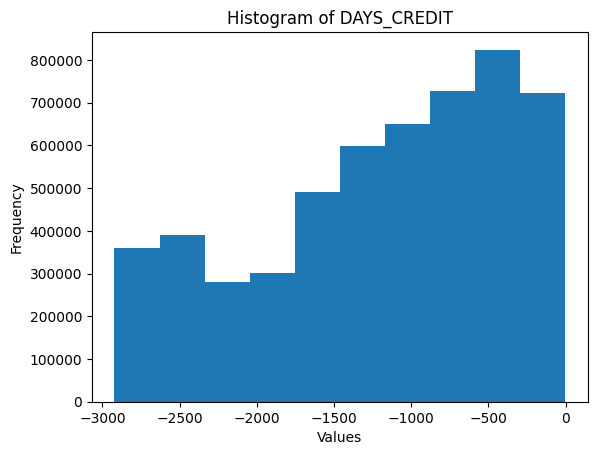

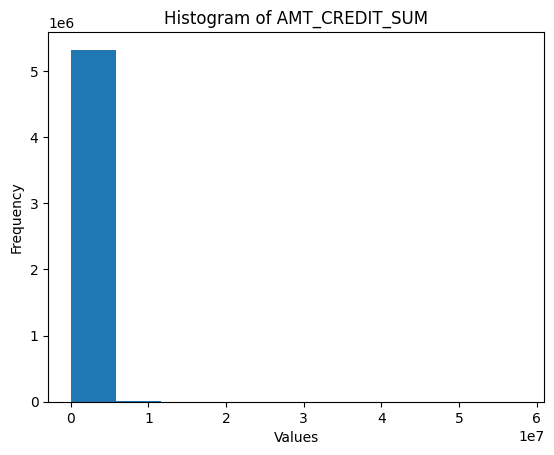

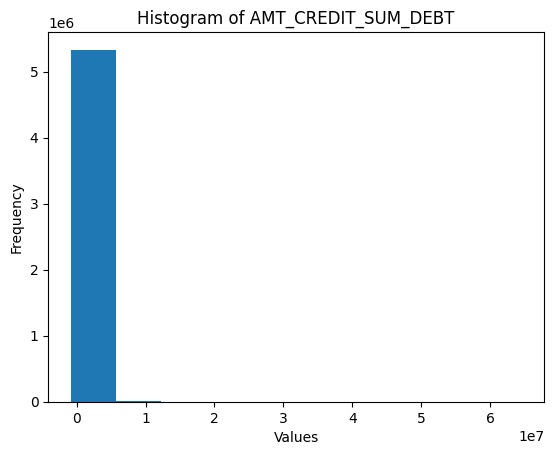

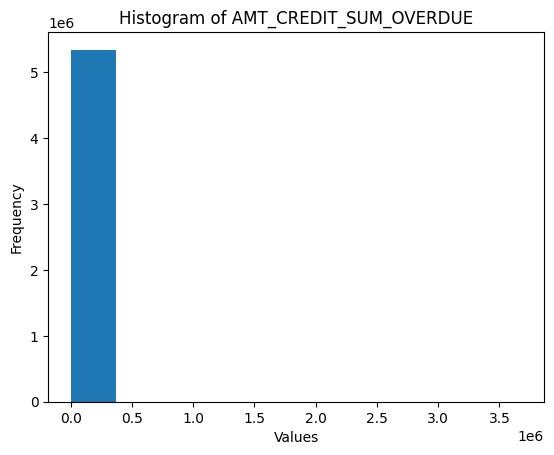

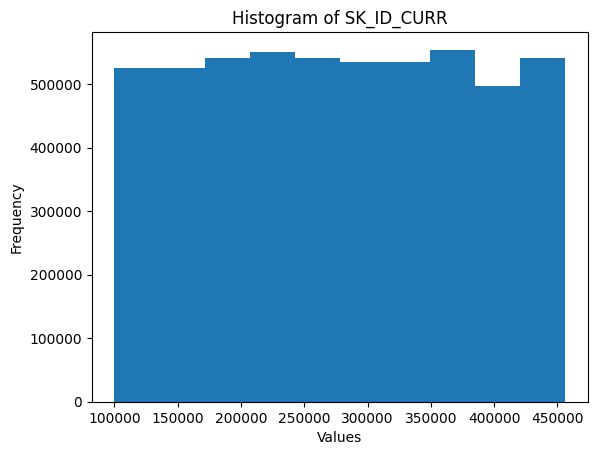

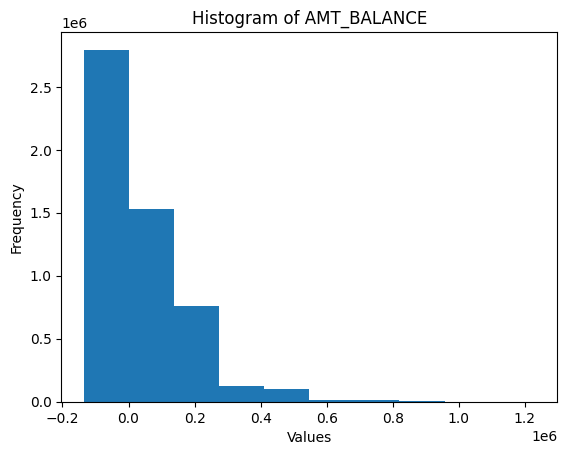

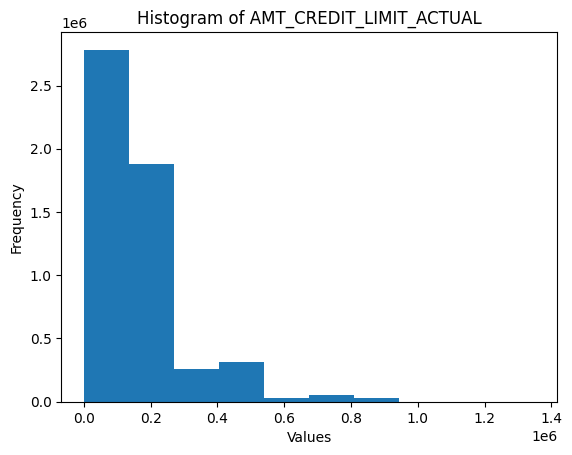

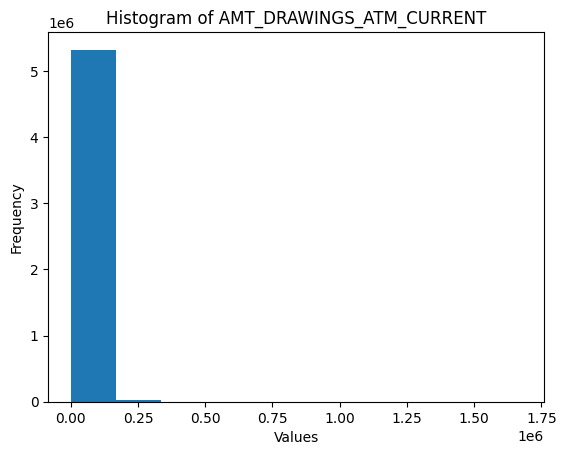

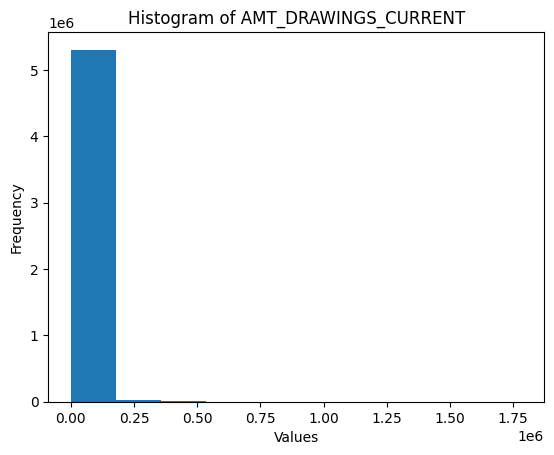

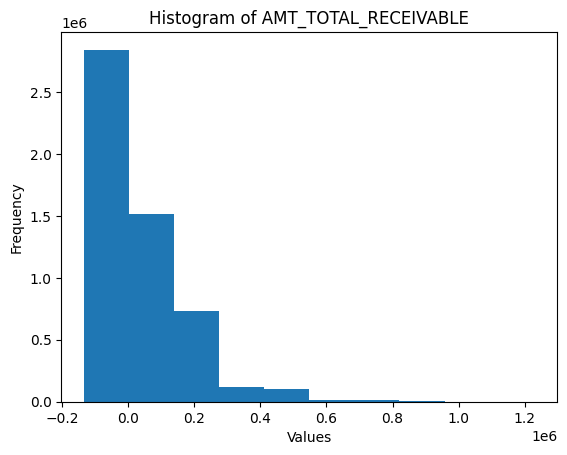

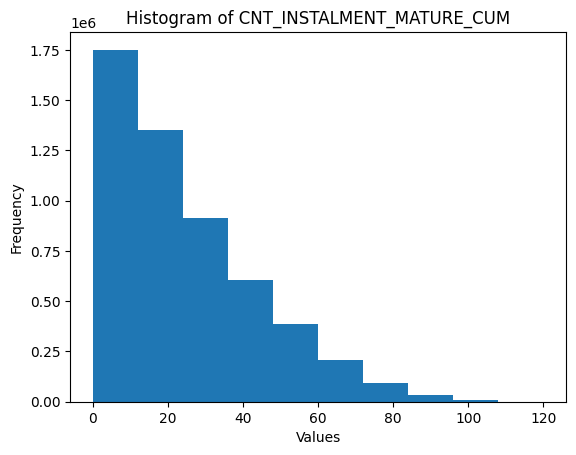

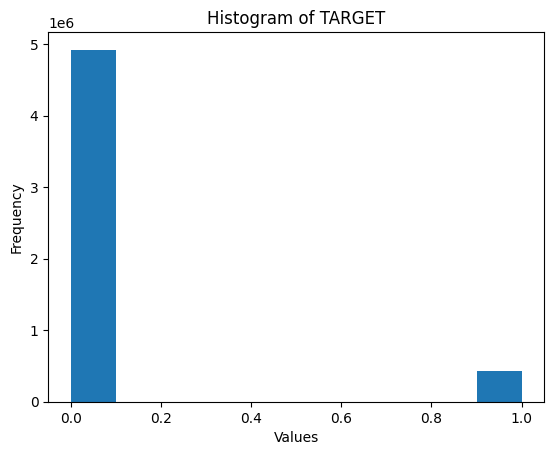

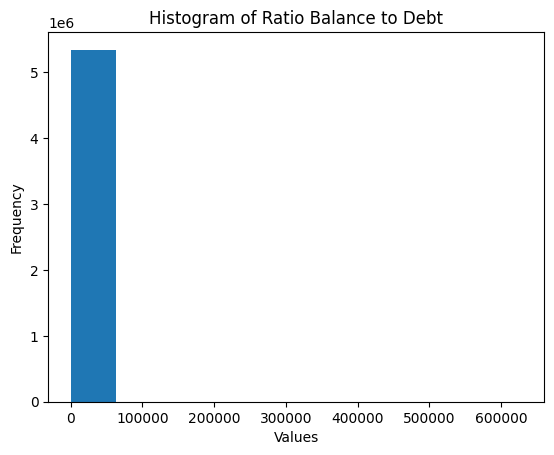

In [24]:
#@title Visualise df7
# Get the column names from the DataFrame
column_names = df7.columns

# Plot a histogram for each column
for column in column_names:
    plt.hist(df7[column], bins=10)  # Adjust the number of bins as per your data
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


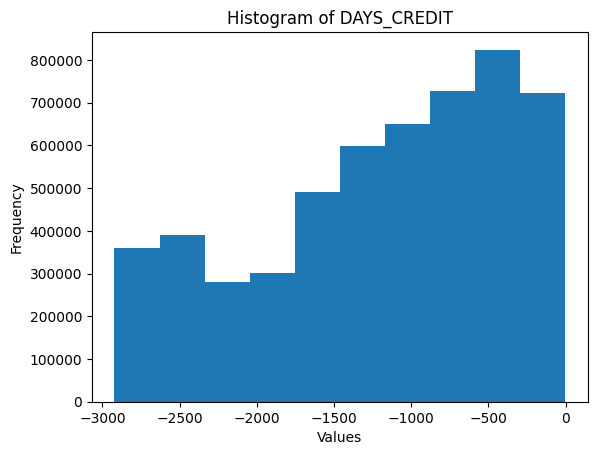

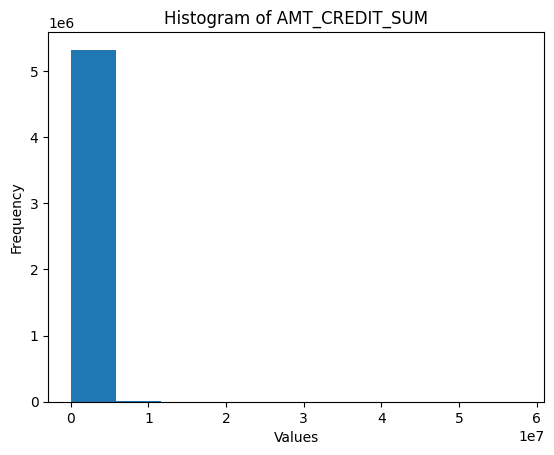

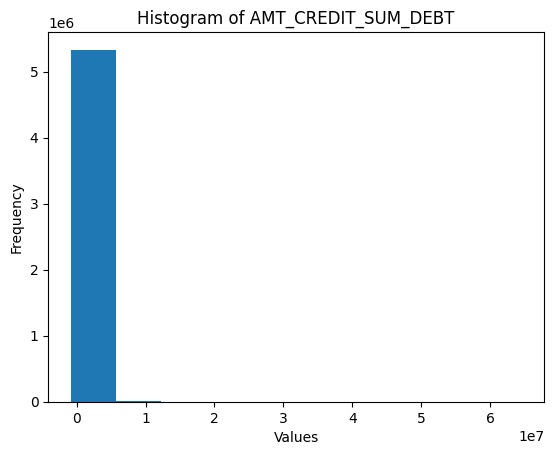

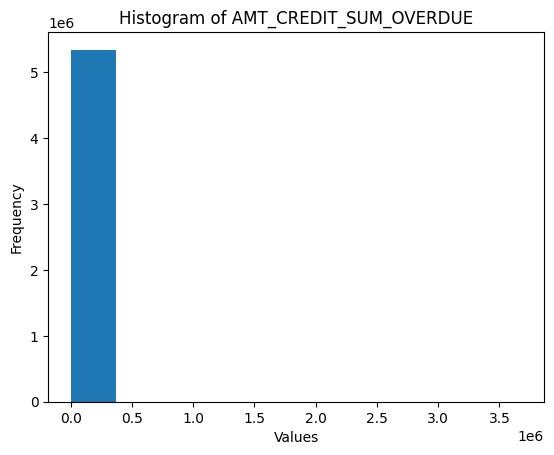

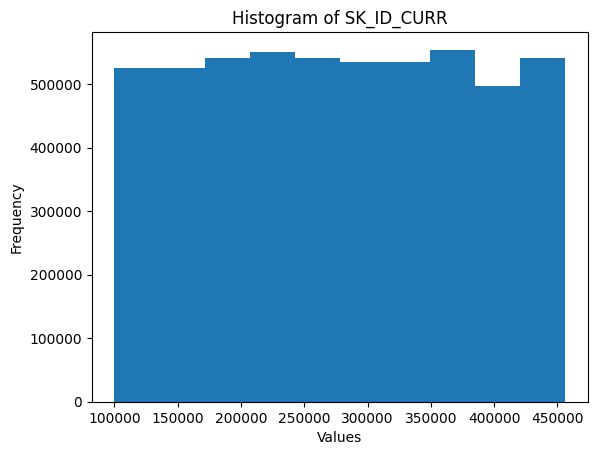

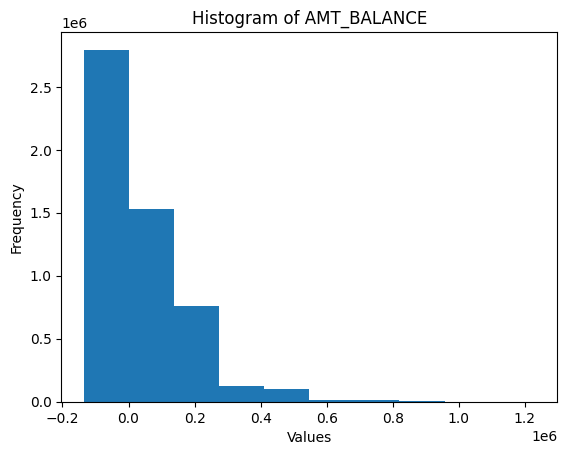

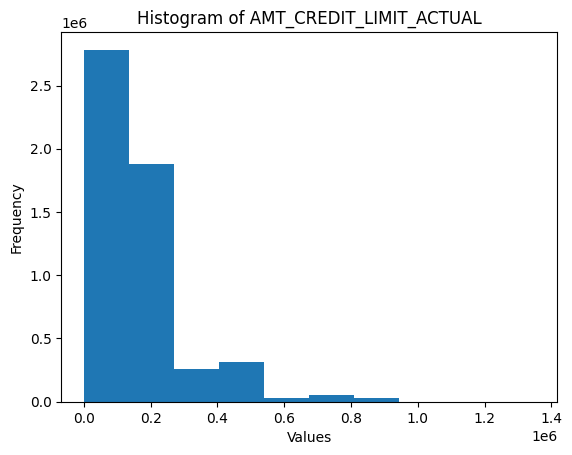

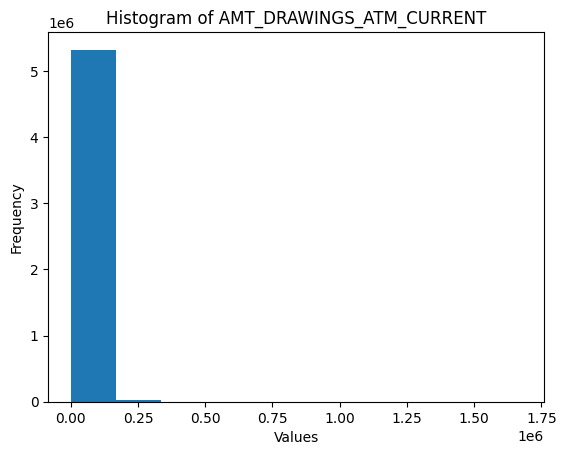

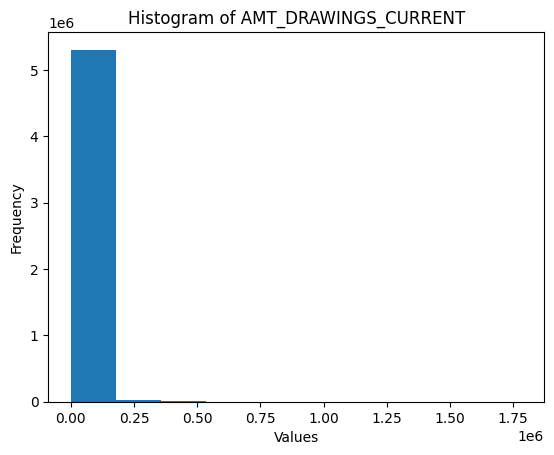

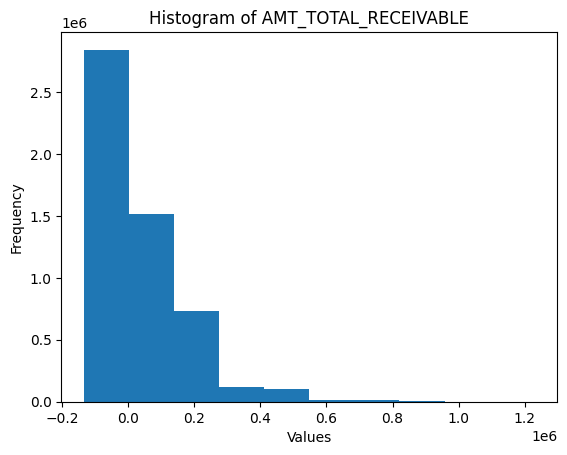

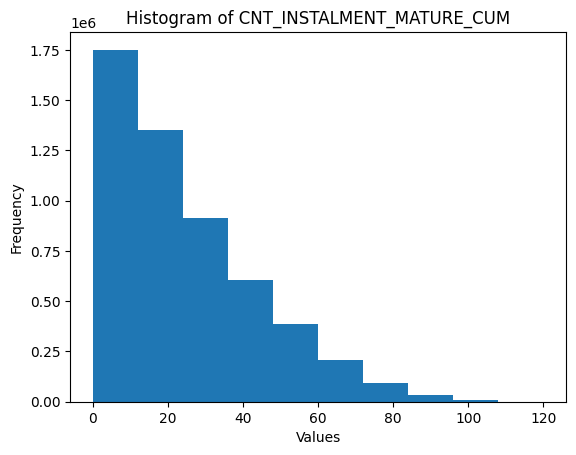

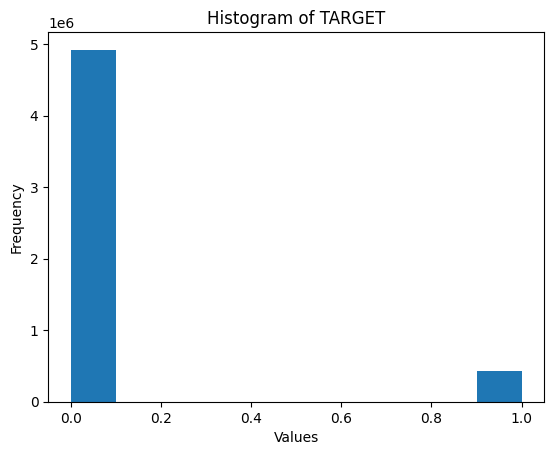

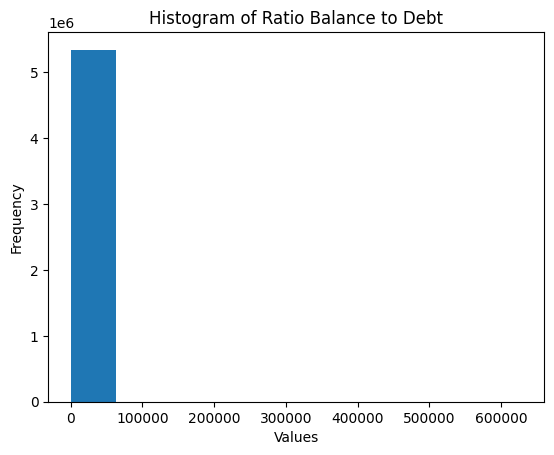

In [25]:
#@title Visualise df7_subset
column_names = df7_subset.columns

# Plot a histogram for each column
for column in column_names:
    plt.hist(df7[column], bins=10)  # Adjust the number of bins as per your data
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


To our surprise, df7_subset is if not an identical visual represantation of initial df7. At least it is so closed that it almost imposbile to notice any difference between them. Moreover, thanks to randomelly choosing 10% of data set, we kept intagrity of a data set. Still, we are impresed with how similar those data sets are.

In [ ]:
print(df7_subset.isna().values.any())
print((df7_subset.values == np.inf).any() or (df7_subset.values == -np.inf).any())

False
False


In [ ]:
df7_subset.describe()

,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,SK_ID_CURR,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,TARGET,Ratio Balance to Debt
count,534517.000000,5.345170e+05,5.345170e+05,534517.000000,534517.000000,5.345170e+05,5.345170e+05,5.345170e+05,5.345170e+05,5.345170e+05,534517.000000,534517.000000,534517.000000
mean,-1197.218826,3.688477e+05,1.465104e+05,12.034122,278006.275161,6.802675e+04,1.395604e+05,4.620168e+03,7.113992e+03,6.782933e+04,24.162530,0.079146,7.363216
std,810.580151,8.178836e+05,6.339752e+05,745.880116,102253.957783,1.104268e+05,1.452068e+05,2.421240e+04,3.260683e+04,1.101266e+05,19.401061,0.269967,737.624652
min,-2922.000000,4.500000e-01,-8.688455e+05,0.000000,100011.000000,-1.353590e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.334422e+05,0.000000,0.000000,-6.015956
25%,-1747.000000,6.297750e+04,0.000000e+00,0.000000,189542.000000,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
50%,-1059.000000,1.417500e+05,0.000000e+00,0.000000,277414.000000,1.350000e+02,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,19.000000,0.000000,0.000807
75%,-507.000000,3.645000e+05,6.269629e+04,0.000000,366415.000000,1.104804e+05,1.800000e+05,0.000000e+00,0.000000e+00,1.104030e+05,35.000000,0.000000,0.655494
max,-1.000000,4.410000e+07,6.457024e+07,106240.500000,456247.000000,1.229704e+06,1.350000e+06,1.676250e+06,1.783582e+06,1.229704e+06,120.000000,1.000000,199754.200000


We can see that we did handle inf values pretty well.

In [ ]:
df7_subset.sum()

DAYS_CREDIT                 -6.399338e+08
AMT_CREDIT_SUM               1.971554e+11
AMT_CREDIT_SUM_DEBT          7.831231e+10
AMT_CREDIT_SUM_OVERDUE       6.432443e+06
SK_ID_CURR                   1.485991e+11
AMT_BALANCE                  3.636146e+10
AMT_CREDIT_LIMIT_ACTUAL      7.459740e+10
AMT_DRAWINGS_ATM_CURRENT     2.469558e+09
AMT_DRAWINGS_CURRENT         3.802550e+09
AMT_TOTAL_RECEIVABLE         3.625593e+10
CNT_INSTALMENT_MATURE_CUM    1.291528e+07
TARGET                       4.230500e+04
Ratio Balance to Debt        3.935764e+06
dtype: float64

Using newelly created dataset pre-traine the model

In [ ]:
#@title Normolize data set
# Separate features and target from df7_subset
X = df7_subset.drop('TARGET', axis=1)
y = df7_subset['TARGET']

# Replace 'inf' values with NaN in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column in X
X.fillna(X.mean(), inplace=True)

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the scaler to the feature matrix X
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to dataframe, using original column names
X = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target column back to the dataframe
df7_subset_scaled = pd.concat([X, y], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Accuracy: 0.934255974444182
Test Accuracy: 0.9326498540746838
Precision: 0.9489942528735632
Recall: 0.15633136094674557
F1 Score: 0.26844137370453164
Confusion Matrix:
 [[98383    71]
 [ 7129  1321]]
ROC AUC Score: 0.8285287635603832
Log Loss: 0.21152534356964545


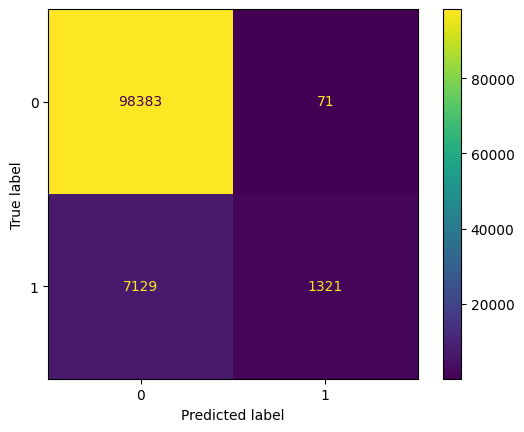

In [ ]:
#@title Create Default XGBClassifier With a New Data Set
xgb_clf = XGBClassifier(random_state=1)

# Train XGBClassifier
xgb_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = xgb_clf.predict(X_test)
# For XGBoost model
#y_pred_xgb = xgb_clf.predict(X_test)
# Predict the response for train dataset
y_hat = xgb_clf.predict(X_train)
# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Calculate probabilities for the positive class for test dataset
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)
# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Comparing this default XGBoost to a desicion tree: we did achive more than 100% increase in recall Recall: 0.31021004893185344 </br>



In [ ]:
#@title Find Hyper Parameters For df7_subset XGBoost
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# Separate features and target from df7_subset
X = df7_subset.drop('TARGET', axis=1)
y = df7_subset['TARGET']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
xgb = XGBClassifier()

# Set parameters you want to tune
parameters = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500}
Best Score: 0.9573773477389222


Run time 4 hours

In [ ]:
#@title XGBoost Metrics (Fine-Tuned)

# Predict the response for test dataset using the best estimator from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Predict the response for train dataset
y_hat = grid_search.best_estimator_.predict(X_train)

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Calculate probabilities for the positive class for test dataset
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:,1]

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Train Accuracy: 0.982147408988969
Test Accuracy: 0.9645944024545386
Precision: 0.9860387580745988
Recall: 0.56
F1 Score: 0.7143180617405087
Confusion Matrix:
 [[98387    67]
 [ 3718  4732]]
ROC AUC Score: 0.9760207319959473
Log Loss: 0.10296457454302703


There were some issue with data set, so we had to replace 'inf' values with NaN. We did normolize data set while keeping integrity of TARGET column (in a range of 0 and 1).

By implimenting a new column and normalizing data set we were able to improve precisionm decrease under fiting, and improve AUC-ROC.
It means that the model is making fewer positive predictions overall, resulting in a lower number of false positives. While this may reduce the model's ability to capture all positive instances, it also suggests that the positive predictions made by the model are more reliable and have a higher chance of being correct. While desicion tree produce will peoduce more falls positives.

Overal XGBoost model performe better than desicion tree. While it might loss in f1-score, overal improvments are rolling all over the desicion tree recall, fiting, loss function and so on. In conlusion, each of those predictive models could work well, but would depend on a final goal.